In [1]:
#当当网
import time
import random
import requests
from lxml import etree
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#定义请求的函数
def get_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36 Edg/126.0.0.0',
        'Referer': 'http://bang.dangdang.com/books/bestsellers/01.03.51.00.00.00-recent7-0-0-1-10',
        'Cookie': 'ddscreen=2; dest_area=country_id%3D9000%26province_id%3D111%26city_id%20%3D0%26district_id%3D0%26town_id%3D0; __permanent_id=20240617120150108543616216974825166; __visit_id=20240617120150115423789265634657303; __out_refer=; __rpm=...1718598115731%7C...1718598123595; __trace_id=20240617122203690304218620018361295'}
    response = requests.get(url, headers=headers)
    print(response.status_code)
    response.encoding = 'gbk'
    response = response.text
    #print(response)
    return response

In [3]:
kind_list = ['财经小说2022']
url_list = ['http://bang.dangdang.com/books/bestsellers/01.03.49.00.00.00-year-2022-0-1-']

In [4]:
#解析页面，获取目的信息的函数
def parse_page1(res_1):
    #解析源码，利用xpath语法提取数据
    data = etree.HTML(res_1)
    d_ls = data.xpath('//ul[@class="bang_list clearfix bang_list_mode"]/li')
    page_ls = []
    for d in d_ls:
        #书名
        d1 = d.xpath('.//div[@class="name"]/a/@title')[0]
        print(d1)
        #排名
        try:
            d2 = str(d.xpath('.//div[@class="list_num red"]/text()')[0]).replace('.','')
        except:
            d2 = str(d.xpath('.//div[@class="list_num "]/text()')[0]).replace('.', '')
        print(d2)
        #作者
        d3 = d.xpath('.//div[@class="publisher_info"]/a[1]/text()')[0]
        print(d3)
        #出版社
        d4 = d.xpath('.//div[@class="publisher_info"]/a/text()')[0]
        #价格
        d5 = d.xpath('.//div[@class="price"]/p[1]/span[1]/text()')[0]
        print(d5)
        page_ls.append([d1,d2,d3,d4,d5])
    return page_ls

200
商道
1
崔仁浩
¥24.00
抉择
2
张平
¥29.80
钱商（除了钱，我们需要关心的还有很多）
3
阿瑟·黑利
¥41.25
对赌（2017全新修订版）
4
陈楫宝
¥28.90
圈子圈套3：终局篇
5
王强
¥16.00
圈子圈套2 ：迷局篇
6
王强
¥14.00
黑金时代（“白手套”最终结局）
7
陈楫宝
¥31.90
底牌（上、下册）（当当专享签名版)
8
李德林
¥95.10
纸金时代（当当签名版与普通版随机发货，《对赌》《白手套》作者时隔五年全新力作！）
9
陈楫宝
¥29.90
大数据时代：信息围城
10
夏予川
¥22.50
奋斗者：侯沧海商路笔记3（《侯大利刑侦笔记》《侯卫东官场笔记》畅销作家小桥老树，开启热血奋斗第三弹：地产风云！）
11
小桥老树
¥32.40
融资风云 财经类企业的伴手礼、中国金融史的补充教材
12
王国进
¥34.00
投行恩怨
13
王国进
¥34.00
大狗传
14
迟宇宙
¥26.80
太阳花（黄若围绕项目投资的风云变幻商业题材长篇小说）
15
黄若
¥45.80
大数据时代：虚拟之战
16
夏予川
¥22.50
资本迷局
17
王国进
¥34.00
局中局：中国外企官场透视
18
吴云艳
¥16.50
大数据时代（全两册）
19
夏予川
¥45.00
资本魔方
20
陈一夫
¥18.00
200
危机——绝情华尔街
21
陈思进
¥26.00
金融丽人（银行高管带你看尽金融江湖的爱恨情仇！）
22
芷若
¥28.00
CBD风流志
23
姜立涵
¥11.30
涨跌之间
24
北北
¥34.50
裸奔的钱
25
沈良
¥14.00
金融街
26
陈一夫
¥19.50
股海
27
周书养
¥17.90
金融街：危险交易
28
梁成
¥34.50
投行风云
29
牛莹
¥24.30
三星阴谋
30
金辰明
¥14.50
交手. 大结局 : 最后一战
31
何常在
¥29.30
化险为夷
32
沐桐
¥26.50
老街银行的行长们
33
石丹
¥24.80
财狼
34
天斌
¥19.80
古玩情缘·青花瓷
35
冬雪晚晴
¥19.50
大时代 命运操盘手
36
仇晓慧
¥24.00
芳履金融
37
杨文朴
¥39.90
商道大拿
38
俞越
¥24.80
债务人
39
太极炜昌
¥31.90
大鳄2：七牌梭哈局

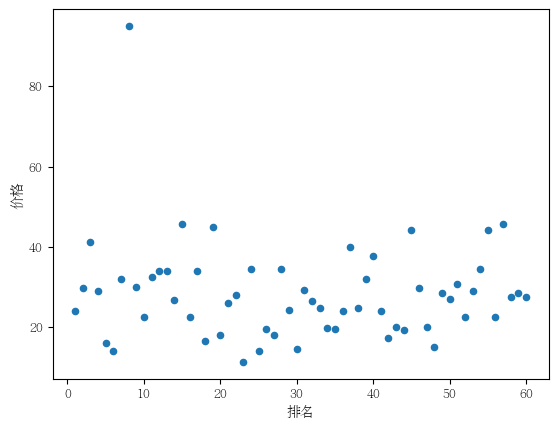

In [5]:
# 调用函数，运行总程序，从第1页爬取到91页
for i in range(len(url_list)):
    # 用于存储单个类别的前60个数据
    single_all_data = []
    # 每个类别爬取3页
    for i_2 in range(1, 4):
        kind = kind_list[0]
        url = url_list[0] + str(i_2)
        try:
            res_1 = get_page(url)
            page_ls_data = parse_page1(res_1)
            for e in page_ls_data:
                single_all_data.append(e)
        except:
            print('此第{}页爬取失败'.format(i))
        time.sleep(random.uniform(1, 2))
    # 转换为dataframe数据，并进行清洗
    pd_data = pd.DataFrame(single_all_data, columns=['名称', '排名', '作者', '出版社', '价格'])
    pd_data['价格'] = pd_data['价格'].str.replace('¥', '').astype(float)
    pd_data['排名'] = pd_data['排名'].astype(float)
    print(pd_data)
    # 绘制散点图
    pd_data.plot.scatter(x='排名', y='价格')
    plt.rcParams['font.sans-serif'] = ['AR PL UMing CN']
    plt.savefig('{}.png'.format(kind))